In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train_ctrUa4K.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Missing Value Imputation

In [6]:
obj_df=df.select_dtypes(include=object)
obj_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [7]:
obj_df.isnull().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [8]:
num_df=df.select_dtypes(include=np.number)
num_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [9]:
num_df.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [10]:
num_df=df.select_dtypes(include=np.number)
for col in num_df.columns:
    df[col]=df[col].fillna(df[col].mean())

In [467]:
obj_df=df.select_dtypes(include=object)
for obj in obj_df.columns:
    df[obj]=df[obj].fillna(df[obj].mode()[0])

In [468]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Diagnosing Outliers

C:\Users\Manish\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


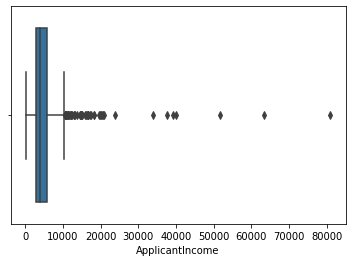

C:\Users\Manish\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


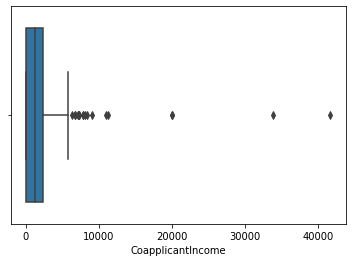

C:\Users\Manish\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


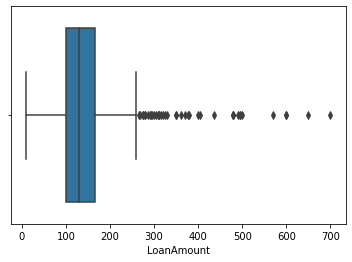

C:\Users\Manish\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


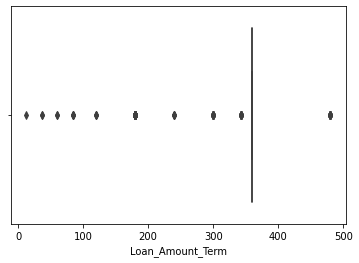

C:\Users\Manish\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


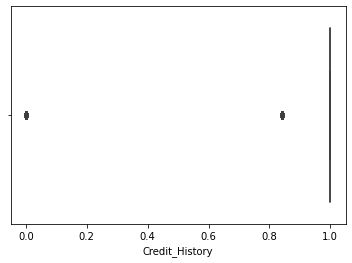

In [469]:
for i in num_df.columns:
    sns.boxplot(df[i])
    plt.show()

In [470]:
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder()

In [471]:
obj_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [472]:
obj_df_new=obj_df.drop(['Loan_ID'],axis=1)

In [473]:
obj_df_new.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [474]:
for i in obj_df_new.columns:
    df[i]=df[i].astype('category')

In [475]:
df['Credit_History']=df['Credit_History'].astype('category')

In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            614 non-null    object  
 1   Gender             614 non-null    category
 2   Married            614 non-null    category
 3   Dependents         614 non-null    category
 4   Education          614 non-null    category
 5   Self_Employed      614 non-null    category
 6   ApplicantIncome    614 non-null    int64   
 7   CoapplicantIncome  614 non-null    float64 
 8   LoanAmount         614 non-null    float64 
 9   Loan_Amount_Term   614 non-null    float64 
 10  Credit_History     614 non-null    category
 11  Property_Area      614 non-null    category
 12  Loan_Status        614 non-null    category
dtypes: category(8), float64(3), int64(1), object(1)
memory usage: 29.8+ KB


In [477]:
df_dm=pd.get_dummies(data=df,columns=obj_df_new.drop('Loan_Status',axis=1).columns)
df_dm

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,146.412162,360.0,1.0,Y,0,1,1,...,0,0,0,1,0,1,0,0,0,1
1,LP001003,4583,1508.0,128.000000,360.0,1.0,N,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,LP001005,3000,0.0,66.000000,360.0,1.0,Y,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,LP001006,2583,2358.0,120.000000,360.0,1.0,Y,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,LP001008,6000,0.0,141.000000,360.0,1.0,Y,0,1,1,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2900,0.0,71.000000,360.0,1.0,Y,1,0,1,...,0,0,0,1,0,1,0,1,0,0
610,LP002979,4106,0.0,40.000000,180.0,1.0,Y,0,1,0,...,0,0,1,1,0,1,0,1,0,0
611,LP002983,8072,240.0,253.000000,360.0,1.0,Y,0,1,0,...,1,0,0,1,0,1,0,0,0,1
612,LP002984,7583,0.0,187.000000,360.0,1.0,Y,0,1,0,...,0,1,0,1,0,1,0,0,0,1


In [478]:
df_dm['Loan_Status']=pd.get_dummies(df['Loan_Status'],drop_first=True)
df_dm

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,146.412162,360.0,1.0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,1
1,LP001003,4583,1508.0,128.000000,360.0,1.0,0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,LP001005,3000,0.0,66.000000,360.0,1.0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,LP001006,2583,2358.0,120.000000,360.0,1.0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,LP001008,6000,0.0,141.000000,360.0,1.0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2900,0.0,71.000000,360.0,1.0,1,1,0,1,...,0,0,0,1,0,1,0,1,0,0
610,LP002979,4106,0.0,40.000000,180.0,1.0,1,0,1,0,...,0,0,1,1,0,1,0,1,0,0
611,LP002983,8072,240.0,253.000000,360.0,1.0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,1
612,LP002984,7583,0.0,187.000000,360.0,1.0,1,0,1,0,...,0,1,0,1,0,1,0,0,0,1


In [479]:
df_dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Loan_ID                  614 non-null    object  
 1   ApplicantIncome          614 non-null    int64   
 2   CoapplicantIncome        614 non-null    float64 
 3   LoanAmount               614 non-null    float64 
 4   Loan_Amount_Term         614 non-null    float64 
 5   Credit_History           614 non-null    category
 6   Loan_Status              614 non-null    uint8   
 7   Gender_Female            614 non-null    uint8   
 8   Gender_Male              614 non-null    uint8   
 9   Married_No               614 non-null    uint8   
 10  Married_Yes              614 non-null    uint8   
 11  Dependents_0             614 non-null    uint8   
 12  Dependents_1             614 non-null    uint8   
 13  Dependents_2             614 non-null    uint8   
 14  Dependents

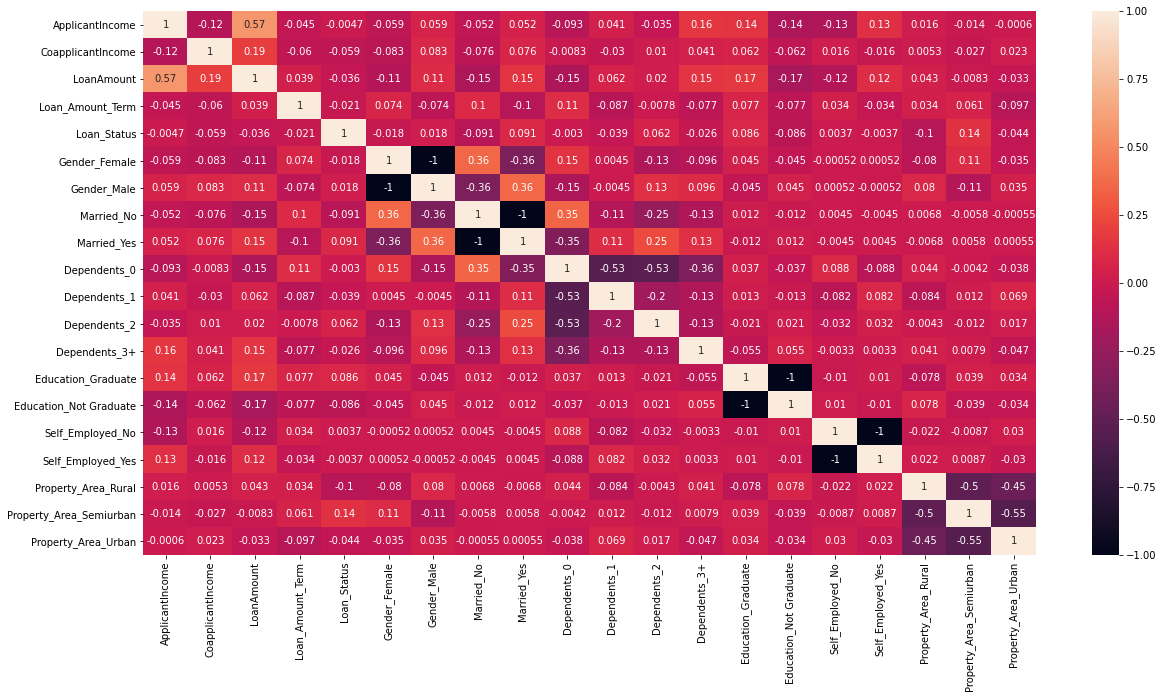

In [480]:
plt.figure(figsize=(20,10))
sns.heatmap(df_dm.corr(),annot=True)
plt.show()

## Train Test Split

In [481]:
from sklearn.model_selection import train_test_split

In [482]:
x=df_dm.drop(['Loan_Status','Loan_ID'],axis=1)
y=df_dm['Loan_Status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [483]:
x_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
81,2395,0.0,146.412162,360.0,1.0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0
133,3459,0.0,25.000000,120.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0
400,2889,0.0,45.000000,180.0,0.0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1
486,3547,0.0,80.000000,360.0,0.0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0
161,7933,0.0,275.000000,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1


# Base Model

In [484]:
from sklearn.linear_model import LogisticRegression

In [485]:
# Logistic Regression

In [486]:
logreg=LogisticRegression()

In [487]:
y_train.shape

(429,)

In [488]:
x_train.shape

(429, 20)

In [489]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [490]:
y_train_pred_log=logreg.predict(x_train)
y_test_pred_log=logreg.predict(x_test)

Model Evalutaion

In [491]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report,roc_auc_score,roc_curve,log_loss

Accuracy Score

In [492]:
print('Accuracy score Train- logit Reg - Base Model',accuracy_score(y_train,y_train_pred_log))
print('Accuracy score validation- logit Reg - Base Model',accuracy_score(y_test,y_test_pred_log))

Accuracy score Train- logit Reg - Base Model 0.7972027972027972
Accuracy score validation- logit Reg - Base Model 0.7621621621621621


Confusion Matrix

In [493]:
cm_train=confusion_matrix(y_train,y_train_pred_log)
cm_validate=confusion_matrix(y_test,y_test_pred_log)
print('Confusion Matrix of Train \n',cm_train)
print()
print('Confusion Matrix of Validate \n',cm_validate)

Confusion Matrix of Train 
 [[ 61  70]
 [ 17 281]]

Confusion Matrix of Validate 
 [[ 22  39]
 [  5 119]]


In [494]:
print('classification_report - Train - Log Reg \n',classification_report(y_train,y_train_pred_log))
print()
print('classification_report - Validation- Log Reg \n',classification_report(y_test,y_test_pred_log))

classification_report - Train - Log Reg 
               precision    recall  f1-score   support

           0       0.78      0.47      0.58       131
           1       0.80      0.94      0.87       298

    accuracy                           0.80       429
   macro avg       0.79      0.70      0.72       429
weighted avg       0.79      0.80      0.78       429


classification_report - Validation- Log Reg 
               precision    recall  f1-score   support

           0       0.81      0.36      0.50        61
           1       0.75      0.96      0.84       124

    accuracy                           0.76       185
   macro avg       0.78      0.66      0.67       185
weighted avg       0.77      0.76      0.73       185



In [495]:
print('Log loss for train Logreg',log_loss(y_train,y_train_pred_log))
print('Log loss for Validation Logreg',log_loss(y_test,y_test_pred_log))

Log loss for train Logreg 7.0044977113690985
Log loss for Validation Logreg 8.214796463112691


Roc - Auc Score

In [496]:
print('ROC-AUC-score Logreg',roc_auc_score(y_test,y_test_pred_log))

ROC-AUC-score Logreg 0.6601665785298784


In [497]:
# Decision Tree

In [498]:
from sklearn.tree import DecisionTreeClassifier

In [499]:
model_dt= DecisionTreeClassifier(random_state=1).fit(x_train,y_train)
pred_dt=model_dt.predict(x_test)
print(classification_report(y_test,pred_dt))
print(confusion_matrix(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.58      0.54      0.56        61
           1       0.78      0.81      0.79       124

    accuracy                           0.72       185
   macro avg       0.68      0.67      0.68       185
weighted avg       0.71      0.72      0.72       185

[[ 33  28]
 [ 24 100]]


In [500]:
# Random Forest

In [501]:
from sklearn.ensemble import RandomForestClassifier

In [502]:
model_rf= RandomForestClassifier(random_state=1).fit(x_train,y_train)
pred_rf= model_rf.predict(x_test)
print(classification_report(y_test,pred_rf))
print(confusion_matrix(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.76      0.43      0.55        61
           1       0.77      0.94      0.84       124

    accuracy                           0.77       185
   macro avg       0.77      0.68      0.70       185
weighted avg       0.77      0.77      0.75       185

[[ 26  35]
 [  8 116]]


In [503]:
# KNN

In [504]:
from sklearn.neighbors import KNeighborsClassifier

In [505]:
knn=KNeighborsClassifier(n_neighbors=5)
model_knn=knn.fit(x_train,y_train)
pred_knn=model_knn.predict(x_test)
print(classification_report(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.39      0.18      0.25        61
           1       0.68      0.86      0.76       124

    accuracy                           0.64       185
   macro avg       0.54      0.52      0.50       185
weighted avg       0.59      0.64      0.59       185

[[ 11  50]
 [ 17 107]]


In [506]:
from sklearn.model_selection import GridSearchCV

In [507]:
knn = KNeighborsClassifier()
grid = {'n_neighbors': np.arange(1,25)}
knn_grid=GridSearchCV(knn,grid,cv=5)

In [508]:
knn_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [509]:
knn_grid.best_params_

{'n_neighbors': 17}

In [510]:
knn=KNeighborsClassifier(n_neighbors=17)
model_knn=knn.fit(x_train,y_train)
pred_knn=model_knn.predict(x_test)
print(classification_report(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.25      0.03      0.06        61
           1       0.67      0.95      0.78       124

    accuracy                           0.65       185
   macro avg       0.46      0.49      0.42       185
weighted avg       0.53      0.65      0.54       185

[[  2  59]
 [  6 118]]


In [511]:
# Naive Bayes

In [512]:
from sklearn.naive_bayes import GaussianNB 

In [513]:
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [514]:
y_pred = classifier.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.44      0.57        61
           1       0.77      0.94      0.85       124

    accuracy                           0.78       185
   macro avg       0.78      0.69      0.71       185
weighted avg       0.78      0.78      0.76       185

[[ 27  34]
 [  7 117]]


## Bagging

In [515]:
from sklearn.ensemble import BaggingClassifier

In [516]:
model_bag = BaggingClassifier(base_estimator = logreg, random_state=1)
model_bag.fit(x_train,y_train)
print(model_bag.score(x_test,y_test))

C:\Users\Manish\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Manish\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

0.7945945945945946


C:\Users\Manish\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Manish\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

## Boosting

In [517]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier(base_estimator = logreg, random_state=1)
model_ada.fit(x_train,y_train)
print(model_ada.score(x_test,y_test))

C:\Users\Manish\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7081081081081081


In [518]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier(learning_rate = 0.01, random_state=1)
model_gb.fit(x_train,y_train)
print(model_gb.score(x_test,y_test))

0.7837837837837838


## Bagging of Logistic regression gives us maximum accuracy of 0.79

# Applying the model on Test Data 

In [519]:
df_test=pd.read_csv('test_lAUu6dG.csv')
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [520]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [521]:
obj_df_test=df_test.select_dtypes(include='object')
for i in obj_df_test.columns:
    df_test[i].fillna(df_test[i].mode()[0],inplace=True)

In [522]:
df_test.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [523]:
num_df=df_test.select_dtypes(include=['int64','float'])
for col in num_df.columns:
    df_test[col]=df_test[col].fillna(df_test[col].median())

In [524]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [525]:
df_test=df_test.drop('Loan_ID',axis=1)

In [526]:
df_test=pd.get_dummies(df_test)

In [527]:
df_test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


Fitting the model

In [528]:
df_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,4158,709,115.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,3250,1993,126.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,5000,2393,158.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


In [529]:
y_pred=logreg.predict(df_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [530]:
y_pred=model_bag.predict(df_test)
print(model_bag.score(df_test,y_pred))

1.0


In [531]:
df_test_new=pd.read_csv('test_lAUu6dG.csv')
df_test_new.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [532]:
df_test_new.shape

(367, 12)

In [533]:
Loan_status=pd.DataFrame(y_pred,columns=["Loan_Status"])
Loan_status

,Loan_Status
0,1
1,1
2,1
3,1
4,1
...,...
362,1
363,1
364,1
365,1


In [534]:
result=pd.merge(
    new_df,
    Loan_status,left_index=True,right_index=True)

In [535]:
result

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [541]:
result.to_csv('final_result.csv')